In [1]:
# get_ipython().magic(u'matplotlib inline')

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

import os

# mpl.style.use("classic")
# mpl.rcParams["figure.figsize"] = [5, 3]

mpl.rcParams["axes.linewidth"] = 0.75
mpl.rcParams["grid.linewidth"] = 0.75
mpl.rcParams["lines.linewidth"] = 0.75
mpl.rcParams["patch.linewidth"] = 0.75
mpl.rcParams["xtick.major.size"] = 3
mpl.rcParams["ytick.major.size"] = 3

mpl.rcParams["pdf.fonttype"] = 42
mpl.rcParams["ps.fonttype"] = 42
mpl.rcParams["font.size"] = 10
mpl.rcParams["axes.titlesize"] = "large"
mpl.rcParams["legend.fontsize"] = "large"

mpl.rcParams["text.usetex"] = True
mpl.rcParams['text.latex.preamble'] = [
    r'\usepackage{amsmath}',
    r'\usepackage{amssymb}']

print("matplotlib %s" % mpl.__version__)

matplotlib 3.0.3


./Plots/MAB/benchmarking.pdf
./Plots/MAB/benchmarking.pdf


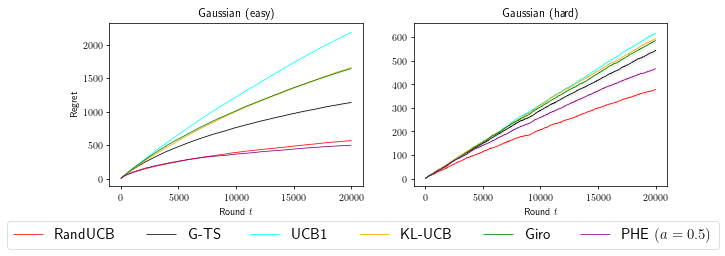

In [4]:
def linestyle2dashes(style):
#   if style == "--":
#     return (3, 3)
#   elif style == ":":
#     return (0.5, 2.5)
#   else:
#     return (None, None)
    if style == 'solid':
        return (0, ())
    elif style == 'dotted':
        return (0, (1, 1))
    elif style == 'loosely dotted':
        return (0, (1, 10))
    elif style == 'densely dotted':
        return (0, (1, 1))
    elif style == 'dashed':
        return (0, (5, 5))
    elif style == 'loosely dashed':
        return (0, (5, 10))
    elif style == 'densely dashed':
        return (0, (5, 1))
    elif style == 'dashdotted':
        return (0, (3, 5, 1, 5))
    elif style == 'loosely dashdotted':
        return (0, (3, 10, 1, 10))
    elif style == 'densely dashdotted':
        return (0, (3, 1, 1, 1))
    elif style == 'dashdotdotted':
        return (0, (3, 5, 1, 5, 1, 5))
    elif style == 'loosely dashdotdotted':
        return (0, (3, 10, 1, 10, 1, 10))
    elif style == 'densely dashdotdotted':
        return (0, (3, 1, 1, 1, 1, 1))

n = 20000

step = np.arange(1, n + 1)
sube = (step.size // 10) * np.arange(1, 11) - 1

environments = [
    ("Gaussian (easy)",),
    ("Gaussian (hard)",),    
#     ("Bernoulli (easy)",),
#     ("Bernoulli (hard)",),
#     ("Beta (easy)",),
#     ("Beta (hard)",),
]

configs = [
#     # ablation study: sampling distribution
#     ("sampling_distribution", [
#         ("RandUCB-Low_Sigma", "red", "dashed", r"Gaussian ($\sigma = 1/16$)"),
#         ("RandUCB", "red", "solid", r"Gaussian ($\sigma = 1/8$)"),
#         ("RandUCB-High_Sigma", "red", "dashdotdotted", r"Gaussian ($\sigma = 1$)"),
#         ("RandUCB-Uniform", "black", "solid", "Uniform"),]),
    
    # ablation study: optimism and coupling
#     ("optimism_coupling", [
#         ("RandUCB", "red", "solid", r"Optimistic and coupled"),
#         ("RandUCB-Not_Optimistic", "blue", "solid", "Non-optimistic and coupled"),
#         ("RandUCB-Not_Coupled", "orange", "solid", "Optimistic and non-coupled"),]),
    
#     # ablation study: number of bins (M)
#     ("nbins", [
#         ("RandUCB", "red", "solid", r"$M = 20$"),
#         ("RandUCB-Small_M", "red", "dashed", r"$M = 5$"),
#         ("RandUCB-Large_M", "red", "dashdotdotted", r"$M = 100$"),]),
    
    # benchmarking
    ("benchmarking", [
        ("RandUCB", "red", "solid", "RandUCB"),
#         ("B-TS", "black", "solid", "B-TS"),
        ("G-TS", "black", "solid", "G-TS"),
        ("UCB1", "cyan", "solid", "UCB1"),
        ("KL-UCB", "orange", "solid", "KL-UCB"),
        ("Giro", "green", "solid", "Giro"),
        ("PHE (a = 0.5)", "purple", "solid", "PHE $(a = 0.5)$"),        
        ]),
    
#     # optimistic TS vs regular
#     ("optimistic_ts", [
#         ("B-TS", "black", "solid", "B-TS"),
#         ("O-B-TS", "black", "dashed", "Optimistic B-TS"),]),

#     # adaptive e-greedy
#     ("adaptive_egreedy", [
#         ("RandUCB_2_e-Greedy", "red", "solid", r"Adaptive $\epsilon$-greedy"),
#         ("EpsilonGreedy", "blue", "solid", r"$\epsilon$-greedy"),]),
    
    # ("RandUCB_2_TS", "red", "-", "TS variant"),
    # ("RandUCB_2_O-TS", "red", ":", "O-TS variant"),
]

for (fig_name, algorithms) in configs:
    plt.figure(figsize=(10, 3))
    for fig_idx, env_def in enumerate(environments):
        env_name = env_def[0]

        res_dir = os.path.join("/Users/sharanvaswani/Desktop/Codes/Bandits/RUCB/", "Results", "MAB", env_name)

        plt.subplot(1, len(environments), fig_idx + 1)

        for alg_idx, alg_def in enumerate(algorithms):
            alg_name, alg_color, alg_line, alg_label = alg_def[0], alg_def[1], alg_def[2], alg_def[3]

            fname = os.path.join(res_dir, alg_name)
            cum_regret = np.loadtxt(fname, delimiter=",")     
            std_regret = cum_regret.std(axis=1) / np.sqrt(cum_regret.shape[1])

    #         plt.plot(step, cum_regret.mean(axis=1), alg_color, dashes=linestyle2dashes(alg_line), label=alg_label)
            plt.plot(step, cum_regret.mean(axis=1), alg_color, linestyle=linestyle2dashes(alg_line), label=alg_label)

    #         plt.errorbar(step[sube], cum_regret[sube, :].mean(axis=1),
    #                      cum_regret[sube, :].std(axis=1) / np.sqrt(cum_regret.shape[1]),
    #                      fmt="none", ecolor=alg_color)        

            plt.fill_between(step,
                             cum_regret.mean(axis=1) - std_regret,
                             cum_regret.mean(axis=1) + std_regret,
                             color=alg_color, alpha=0.05, linewidth=0)        

        plt.title(env_name)
        plt.xlabel(r"Round $t$")

        if fig_idx == 0:
            plt.ylabel("Regret")                
            plt.legend(loc= 'center', frameon = True, bbox_to_anchor=(1,-0.3), fancybox=True, ncol = 6, fontsize = 15)

        plot_dir = os.path.join(".", "Plots", "MAB")
        os.makedirs(plot_dir, exist_ok=True)
        
        fname = os.path.join(plot_dir, fig_name) + ".pdf"
        print(fname)
        plt.savefig(fname, format = "pdf", dpi = 1200, bbox_inches="tight")
plt.show()

In [6]:
print(min(1e-4, np.inf))

0.0001
